In [1]:
import csv
import pandas as pd
import numpy as np
import datetime as dtime
import matplotlib.pyplot as plt
import numpy as np

#  url="https://covid.ourworldindata.org/data/owid-covid-data.csv" Data from 'Our World in Data' webpage

# create data frame from the csv file
covid_df = pd.read_csv(r'https://covid.ourworldindata.org/data/owid-covid-data.csv', delimiter=",", encoding="utf-8", header=0)

# covid_df.head()

#todays date
today_date = np.datetime64(dtime.date.today())
print("Today is:", today_date)
# print(type(today_date))

Today is: 2020-07-31


#  DATA by countries in continent, selected day

In [2]:
#Data frame
cov_df_conts = covid_df[["continent", "location", "date", "total_cases", "new_cases"]]

covid_df_continents = cov_df_conts.copy()

#lets try passing date in the data frame to datetime type
covid_df_continents['date'] = pd.to_datetime(cov_df_conts['date'])

covid_df_continents.set_index("date", inplace=True)

covid_df_continents = covid_df_continents.loc[[today_date]]
# continent = input("Choose continent(caps letter needed), options: Asia, Europe, North America, South America, Africa, Oceania")
continent_sel = "Africa"
covid_df_continents = covid_df_continents[covid_df_continents.continent == continent_sel]
covid_df_continents = covid_df_continents[["location", "total_cases", "new_cases"]].set_index("location")

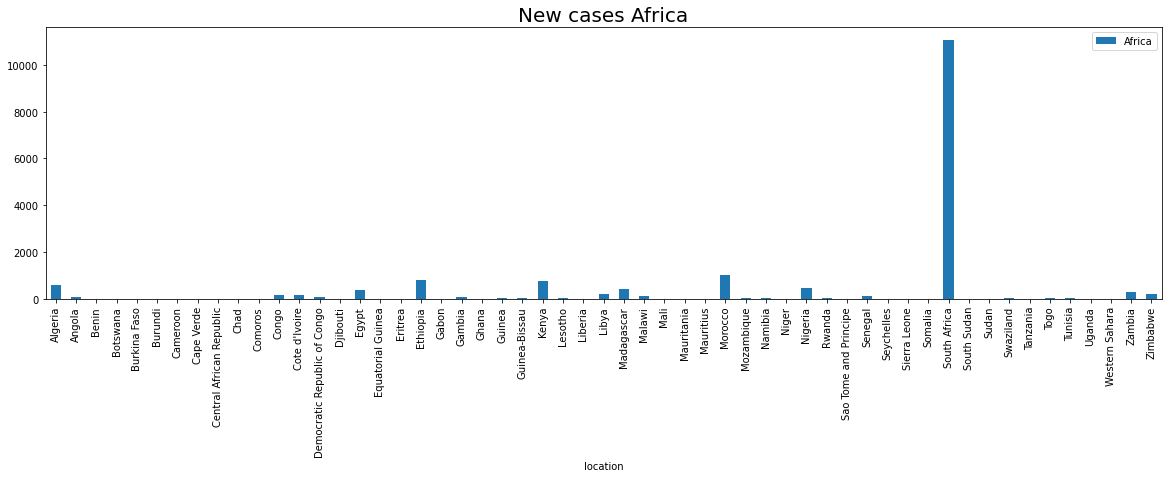

In [3]:
covid_df_continents["new_cases"].plot(kind='bar', figsize = (20,5), label = continent_sel)
plt.title("New cases " + continent_sel, size=20)
plt.legend()

# COUNTRY DATA, evolution, time-series

In [4]:
#DATA FRAME, single country
covid_df_country = covid_df[["continent", "location", "date", "total_cases", "new_cases", "total_deaths", "new_deaths"]]

# country = input("choose country, "World" is also an option:")
country_sel = "Spain"

# days = input("How many days from today?")
days = 120
days = int(days)

#data frame for selected country
covid_df_country = covid_df_country[covid_df_country.location == country_sel]

for i in covid_df_country["new_cases"]:
    if i < 0 or i == "":
        i = 0
covid_df_country.set_index("date", inplace = True)#.sort_values(by = "date")


/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


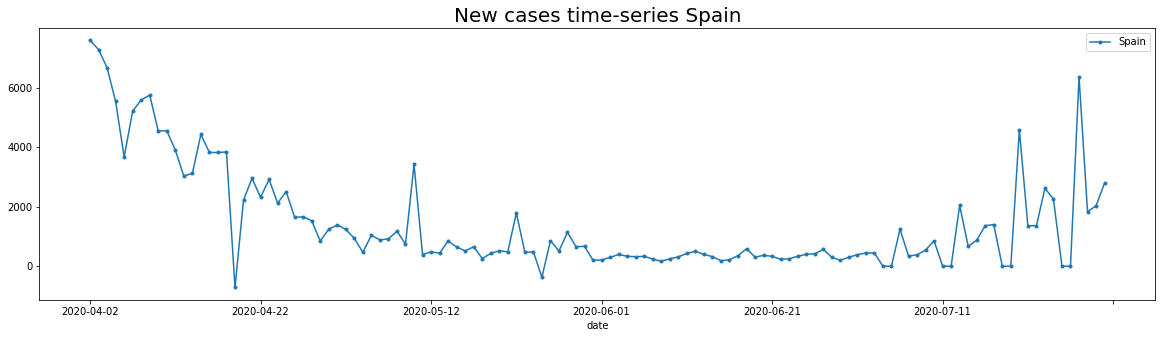

In [5]:
# DATA PLOT, NEW CASES

#covid_df_country["new_cases"][-120:].plot(kind='line', figsize = (20,5), label=country_sel)
covid_df_country["new_cases"][-120:].plot(marker='.', figsize = (20,5), label=country_sel)

plt.title("New cases time-series " + country_sel, size=20)
plt.legend()

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


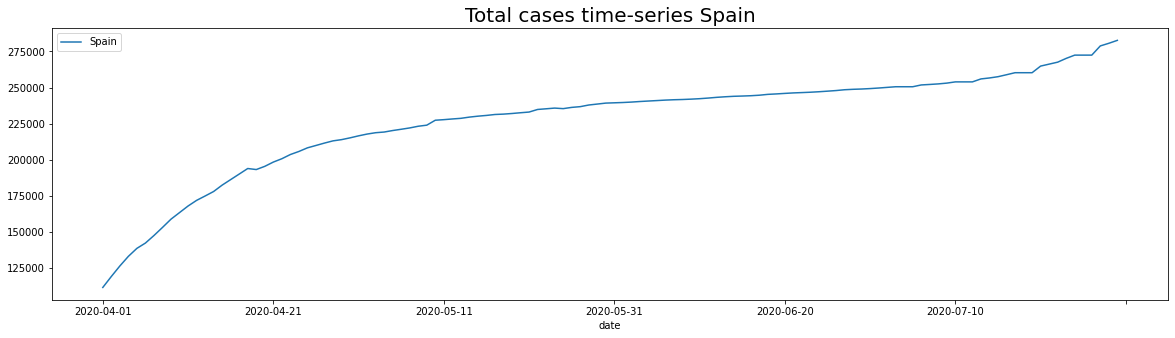

In [6]:
#DATA PLOT, TOTAL CASES
covid_df_country["total_cases"][-120:].plot(kind='line', figsize = (20,5), label=country_sel)
plt.title("Total cases time-series " + country_sel, size=20)
plt.legend()

In [6]:
#DATA FRAME, some countries
covid_df_country = covid_df[["continent", "location", "date", "total_cases", "new_cases", "total_deaths", "new_deaths"]]

country1 = "Spain"
country2 = "France"
country3 = "United Kingdom"
country4 = "Italy"

# days = input("How many days from today?")
days = 120
days = int(days)

#data frames for selected countries
covid_df_country1 = covid_df_country[covid_df_country.location == country1]
covid_df_country1.set_index("date", inplace = True)#.sort_values(by = "date")

covid_df_country2 = covid_df_country[covid_df_country.location == country2]
covid_df_country2.set_index("date", inplace = True)#.sort_values(by = "date")

covid_df_country3 = covid_df_country[covid_df_country.location == country3]
covid_df_country3.set_index("date", inplace = True)#.sort_values(by = "date")

covid_df_country4 = covid_df_country[covid_df_country.location == country4]
covid_df_country4.set_index("date", inplace = True)#.sort_values(by = "date")

/usr/local/lib/python3.8/dist-packages/pandas/plotting/_matplotlib/core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


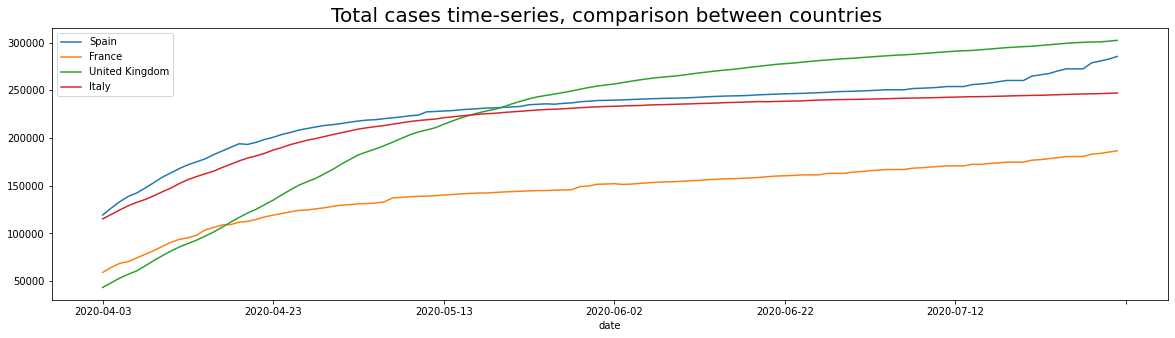

In [7]:
#DATA PLOT, TOTAL CASES
days = 120
covid_df_country1["total_cases"][-days:].plot(kind='line', figsize = (20,5), label=country1)
covid_df_country2["total_cases"][-days:].plot(kind='line', figsize = (20,5), label=country2)
covid_df_country3["total_cases"][-days:].plot(kind='line', figsize = (20,5), label=country3)
covid_df_country4["total_cases"][-days:].plot(kind='line', figsize = (20,5), label=country4)

plt.title("Total cases time-series, comparison between countries ", size=20)
plt.legend()